##Inspiration for the Project
The World Health Organization estimates that approximately 12 million people die annually from heart diseases worldwide. In developed countries like the United States, cardiovascular diseases are responsible for nearly half of all deaths. Early detection of these conditions can help in making informed decisions regarding lifestyle modifications for high-risk individuals, thereby reducing potential complications. This research aims to identify the most significant risk factors contributing to heart disease and to predict the overall risk using nine models: Logistic Regression, K-Nearest Neighbors (KNN), Naive Bayes (NB), Support Vector Machine (SVM), Random Forest, Decision Tree, XGBoost, Gradient Boosting, and AdaBoost.

##Data Exploration
  Let's explore the data Set.

#About Dataset (Meta data)

The dataset is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not.

#Content

Attribute Information:¶

age

sex

cp = chest pain type (4 values)

trestbps = resting blood pressure

chol = serum cholestoral in mg/dl

fbs = fasting blood sugar > 120 mg/dl

restecg = resting electrocardiographic results (values 0,1,2)

thalach = maximum heart rate achieved

exang = exercise induced angina

oldpeak = ST depression induced by exercise relative to rest

slope = the slope of the peak exercise ST segment

ca = number of major vessels (0-3) colored by flourosopy

thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

target:0 for no presence of heart disease, 1 for presence of heart disease


#Import Libraries
lets start the project by importing all the libraries that we will need in the project.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
450,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
101,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
923,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1
14,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0
390,58,0,1,136,319,1,0,152,0,0.0,2,2,2,0


In [5]:
df.shape


(1025, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [8]:
df.target.value_counts()


target
1    526
0    499
Name: count, dtype: int64

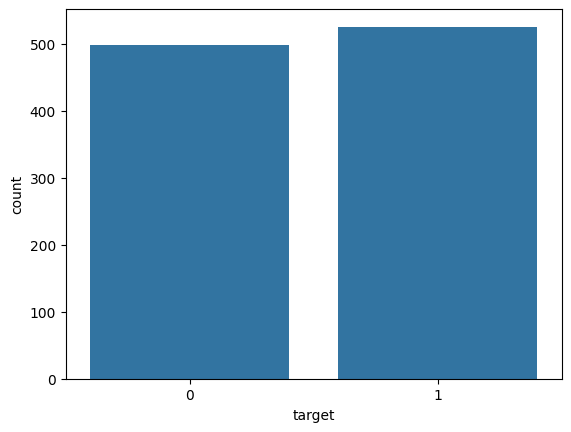

In [9]:
sns.countplot(data=df,x='target');

In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

No missing value so we good to go

In the dataset, there are 14 columns. Also, there are no null values in this dataset. The details of each variables also can be seen above. However, the data types for some columns are not matched. Below will fixed the data types for those column before analysis performed.

In [11]:
#  Fix Data Types
col=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
df[col] = df[col].astype(object)

In [12]:
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# Data exploration

sex(gender)

*************************
.: Sex (Gender) Total :.
*************************
sex
1    713
0    312
Name: count, dtype: int64


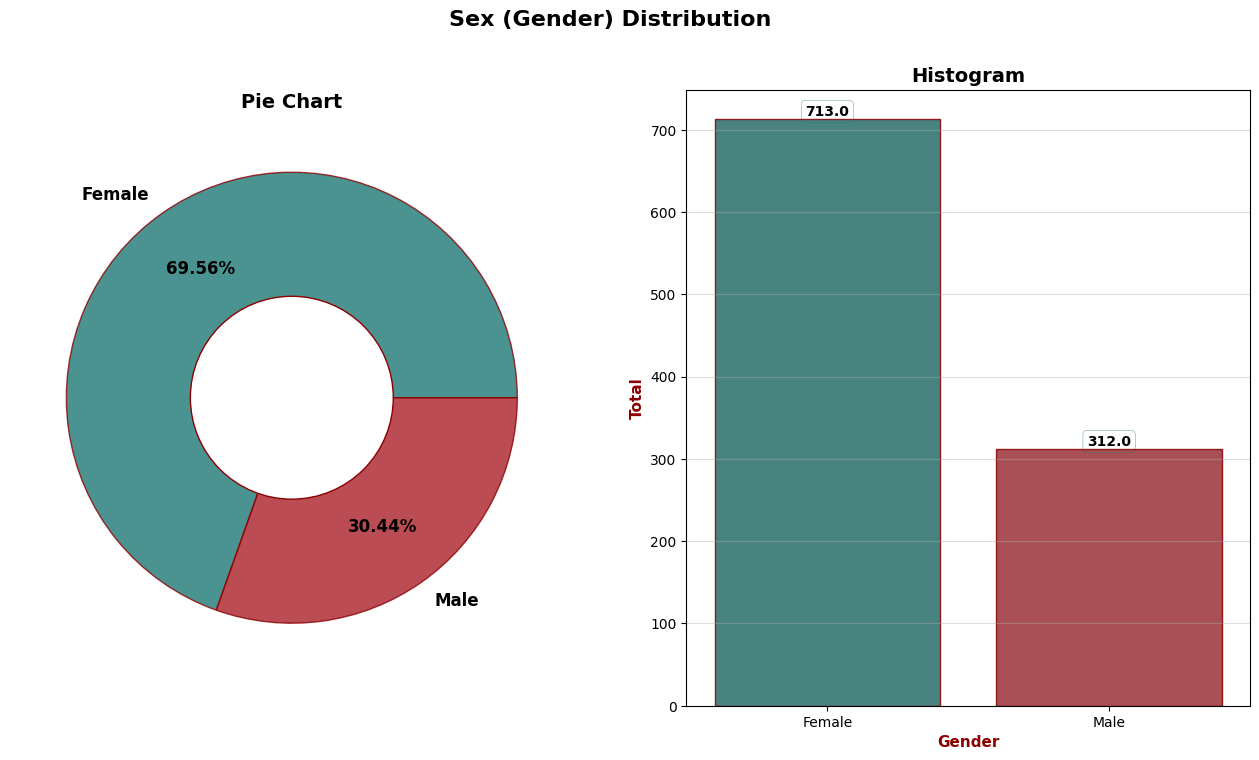

In [13]:
# --- Setting Labels, Order ---
labels = ['Female', 'Male']
order = df['sex'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Sex (Gender) Distribution', fontweight='black', fontsize=16, fontfamily='sans-serif')

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='black', fontsize=14, fontfamily='sans-serif')
colors = ["#1d7874", "#AC1F29"]  # Reusing colors from the provided code
plt.pie(
    df['sex'].value_counts(),
    labels=labels,
    colors=colors,
    pctdistance=0.7,
    autopct='%.2f%%',
    wedgeprops=dict(alpha=0.8, edgecolor='#8B0000'),  # Edge color adapted
    textprops={'fontsize': 12, 'fontweight': 'black'}
)
centre = plt.Circle((0, 0), 0.45, fc='white', edgecolor='#8B0000')
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='black', fontsize=14, fontfamily='sans-serif')
ax = sns.countplot(
    x='sex',
    data=df,
    palette=colors,  # Using the same color palette
    order=order,
    edgecolor='#8B0000',  # Edge color adapted
    alpha=0.85
)
for rect in ax.patches:
    ax.text(
        rect.get_x() + rect.get_width() / 2,
        rect.get_height() + 4.25,
        rect.get_height(),
        ha='center',
        fontweight='black',
        fontsize=10,
        bbox=dict(facecolor='none', edgecolor='#1d7874', linewidth=0.25, boxstyle='round')
    )

plt.xlabel('Gender', fontweight='black', fontsize=11, fontfamily='sans-serif', color='#8B0000')
plt.ylabel('Total', fontweight='black', fontsize=11, fontfamily='sans-serif', color='#8B0000')
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels without Dropping Null Values ---
print('*' * 25)
print('\033[1m' + '.: Sex (Gender) Total :.' + '\033[0m')
print('*' * 25)
print(df.sex.value_counts(dropna=False))


cp(chest pain type)

******************************
.: Chest Pain Type Total :.
******************************
cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64


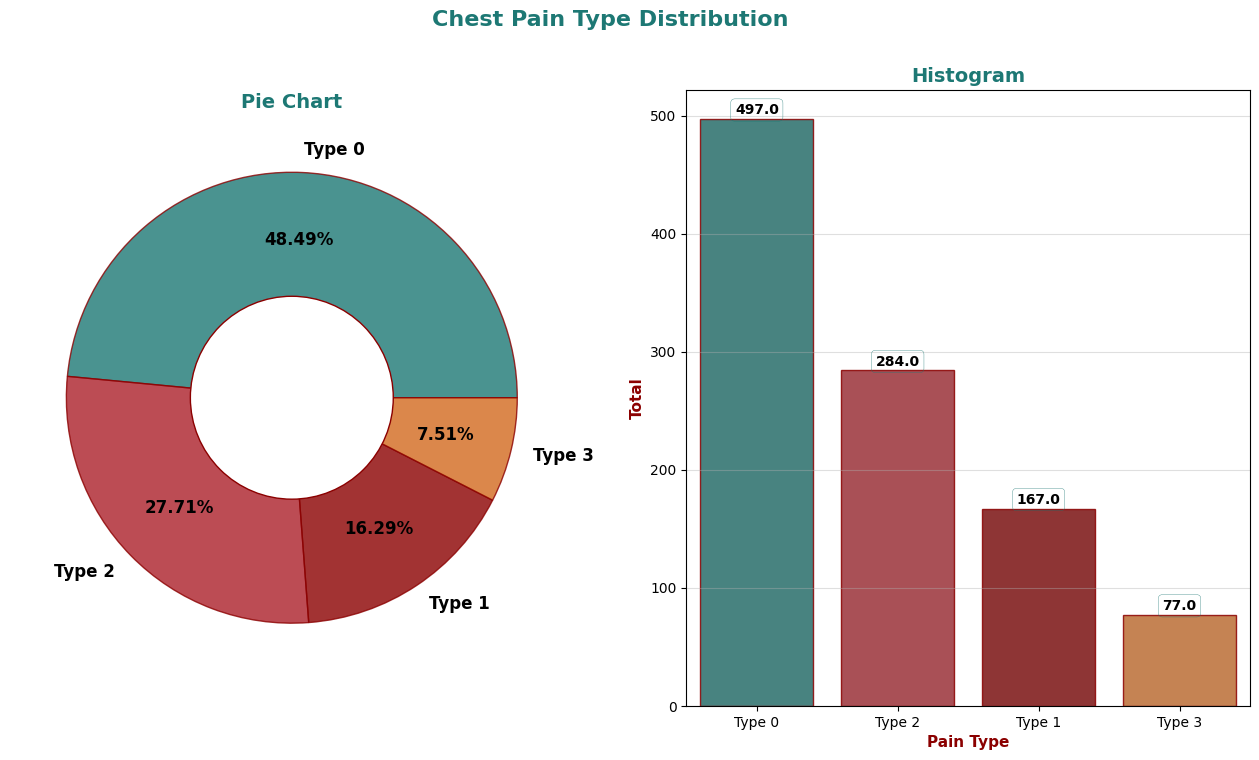

In [14]:
# --- Setting Colors, Labels, Order ---
colors = ["#1d7874", "#AC1F29", "#8B0000", "#D2691E"]  # Colors adapted from the provided code
labels = ['Type 0', 'Type 2', 'Type 1', 'Type 3']
order = df['cp'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Chest Pain Type Distribution', fontweight='black', fontsize=16,
             fontfamily='sans-serif', color='#1d7874')

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='black', fontsize=14, fontfamily='sans-serif', color='#1d7874')
plt.pie(
    df['cp'].value_counts(),
    labels=labels,
    colors=colors,
    pctdistance=0.7,
    autopct='%.2f%%',
    textprops={'fontsize': 12, 'fontweight': 'black'},
    wedgeprops=dict(alpha=0.8, edgecolor='#8B0000')  # Edge color adapted
)
centre = plt.Circle((0, 0), 0.45, fc='white', edgecolor='#8B0000')
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='black', fontsize=14, fontfamily='sans-serif', color='#1d7874')
ax = sns.countplot(
    x='cp',
    data=df,
    palette=colors,  # Using the adapted colors
    order=order,
    edgecolor='#8B0000',  # Edge color adapted
    alpha=0.85
)
for rect in ax.patches:
    ax.text(
        rect.get_x() + rect.get_width() / 2,
        rect.get_height() + 4.25,
        rect.get_height(),
        ha='center',
        fontsize=10,
        fontweight='black',
        bbox=dict(facecolor='none', edgecolor='#1d7874', linewidth=0.25, boxstyle='round')
    )

plt.xlabel('Pain Type', fontweight='black', fontsize=11, fontfamily='sans-serif', color='#8B0000')
plt.ylabel('Total', fontweight='black', fontsize=11, fontfamily='sans-serif', color='#8B0000')
plt.xticks([0, 1, 2, 3], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels without Dropping Null Values ---
print('*' * 30)
print('\033[1m' + '.: Chest Pain Type Total :.' + '\033[0m')
print('*' * 30)
print(df.cp.value_counts(dropna=False))


fbs(fasting blood sugar)

********************************
.: Fasting Blood Sugar Total :.
********************************
fbs
0    872
1    153
Name: count, dtype: int64


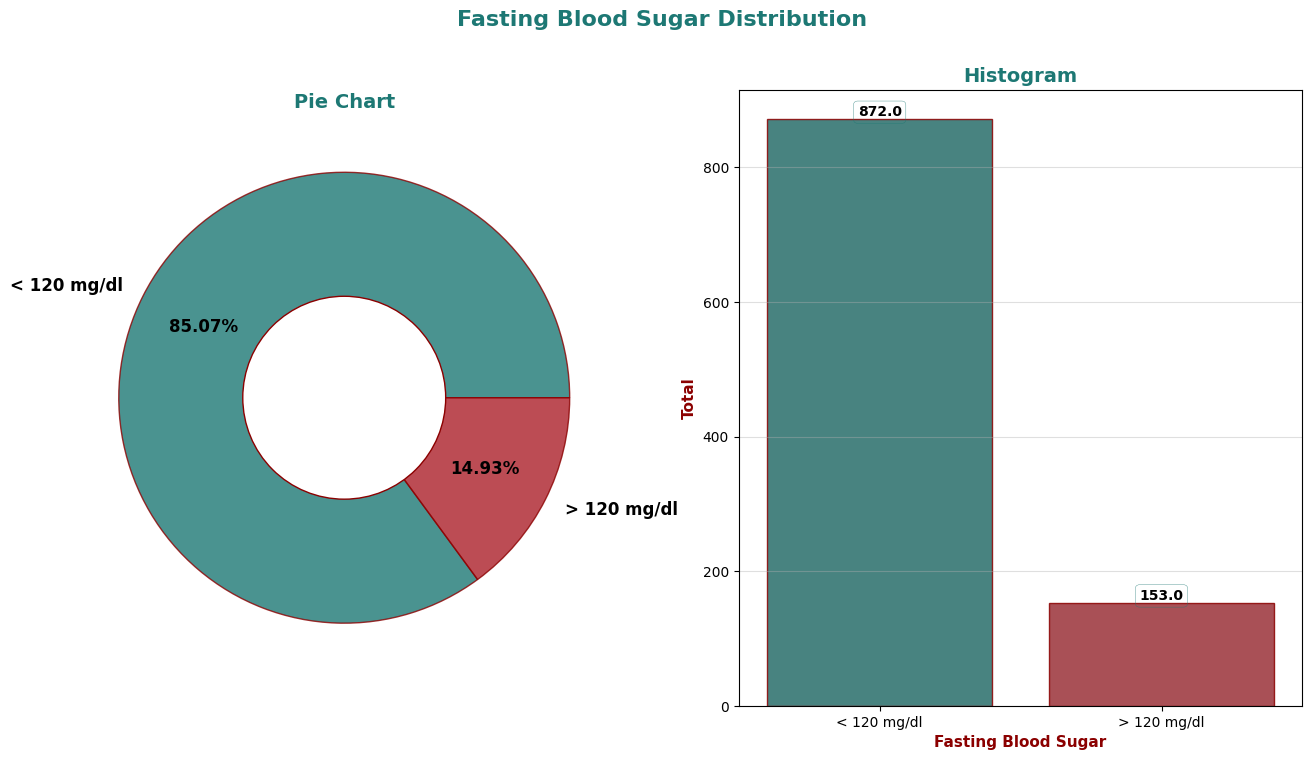

In [15]:
# --- Setting Colors, Labels, Order ---
colors = ["#1d7874", "#AC1F29"]  # Colors adapted from the provided code
labels = ['< 120 mg/dl', '> 120 mg/dl']
order = df['fbs'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Fasting Blood Sugar Distribution', fontweight='black', fontsize=16,
             fontfamily='sans-serif', color='#1d7874')

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='black', fontsize=14, fontfamily='sans-serif', color='#1d7874')
plt.pie(
    df['fbs'].value_counts(),
    labels=labels,
    colors=colors,
    wedgeprops=dict(alpha=0.8, edgecolor='#8B0000'),  # Edge color adapted
    autopct='%.2f%%',
    pctdistance=0.7,
    textprops={'fontsize': 12, 'fontweight': 'black'}
)
centre = plt.Circle((0, 0), 0.45, fc='white', edgecolor='#8B0000')
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='black', fontsize=14, fontfamily='sans-serif', color='#1d7874')
ax = sns.countplot(
    x='fbs',
    data=df,
    palette=colors,  # Using adapted colors
    order=order,
    edgecolor='#8B0000',  # Edge color adapted
    alpha=0.85
)
for rect in ax.patches:
    ax.text(
        rect.get_x() + rect.get_width() / 2,
        rect.get_height() + 4.25,
        rect.get_height(),
        ha='center',
        fontsize=10,
        fontweight='black',
        bbox=dict(facecolor='none', edgecolor='#1d7874', linewidth=0.25, boxstyle='round')
    )

plt.xlabel('Fasting Blood Sugar', fontweight='black', fontsize=11, fontfamily='sans-serif', color='#8B0000')
plt.ylabel('Total', fontweight='black', fontsize=11, fontfamily='sans-serif', color='#8B0000')
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels without Dropping Null Values ---
print('*' * 32)
print('\033[1m' + '.: Fasting Blood Sugar Total :.' + '\033[0m')
print('*' * 32)
print(df.fbs.value_counts(dropna=False))


restecg (Resting Electrocardiographic Results)

**************************************************
.: Resting Electrocardiographic Results Total :.
**************************************************
restecg
1    513
0    497
2     15
Name: count, dtype: int64


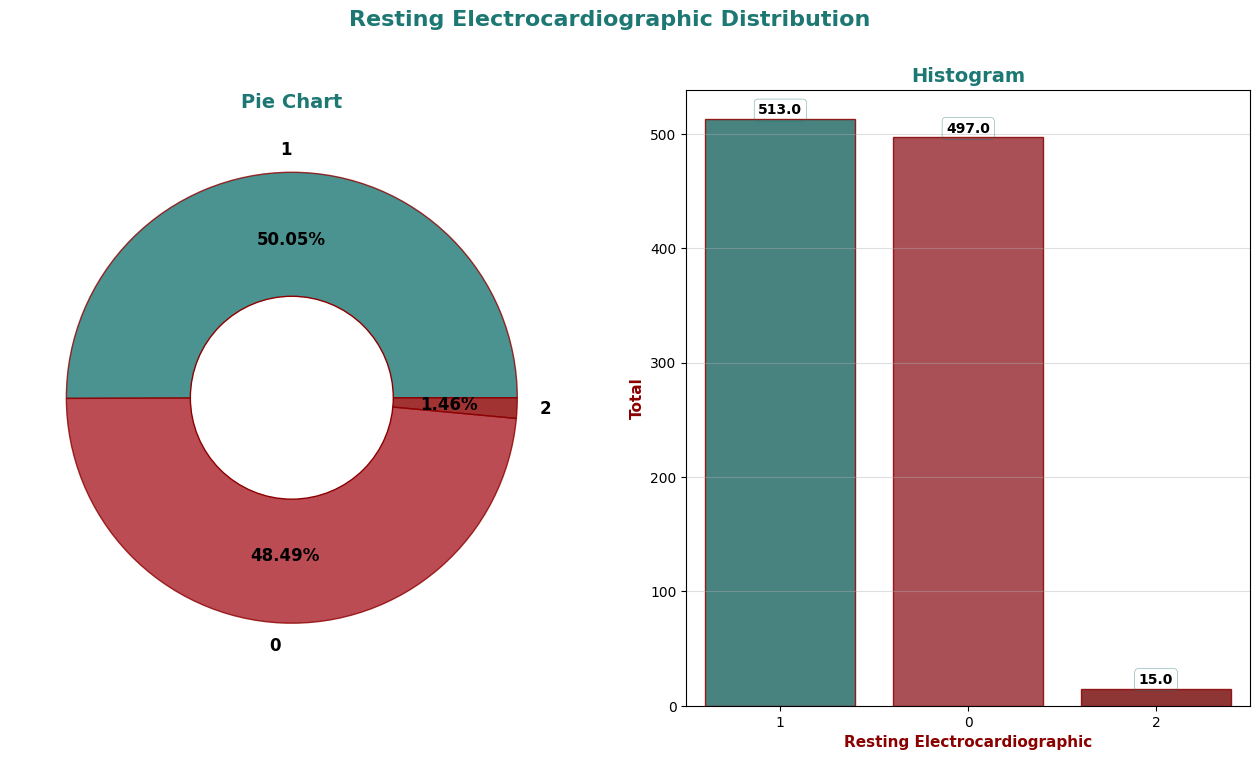

In [16]:
# --- Setting Colors, Labels, Order ---
colors = ["#1d7874", "#AC1F29", "#8B0000"]  # Colors adapted from the provided code
labels = ['1', '0', '2']
order = df['restecg'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Resting Electrocardiographic Distribution', fontweight='black', fontsize=16,
             fontfamily='sans-serif', color='#1d7874')

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='black', fontsize=14, fontfamily='sans-serif', color='#1d7874')
plt.pie(
    df['restecg'].value_counts(),
    labels=labels,
    colors=colors,
    wedgeprops=dict(alpha=0.8, edgecolor='#8B0000'),  # Edge color adapted
    autopct='%.2f%%',
    pctdistance=0.7,
    textprops={'fontsize': 12, 'fontweight': 'black'}
)
centre = plt.Circle((0, 0), 0.45, fc='white', edgecolor='#8B0000')
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='black', fontsize=14, fontfamily='sans-serif', color='#1d7874')
ax = sns.countplot(
    x='restecg',
    data=df,
    palette=colors,  # Using adapted colors
    order=order,
    edgecolor='#8B0000',  # Edge color adapted
    alpha=0.85
)
for rect in ax.patches:
    ax.text(
        rect.get_x() + rect.get_width() / 2,
        rect.get_height() + 4.25,
        rect.get_height(),
        ha='center',
        fontsize=10,
        fontweight='black',
        bbox=dict(facecolor='none', edgecolor='#1d7874', linewidth=0.25, boxstyle='round')
    )

plt.xlabel('Resting Electrocardiographic', fontweight='black', fontsize=11, fontfamily='sans-serif', color='#8B0000')
plt.ylabel('Total', fontweight='black', fontsize=11, fontfamily='sans-serif', color='#8B0000')
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels without Dropping Null Values ---
print('*' * 50)
print('\033[1m' + '.: Resting Electrocardiographic Results Total :.' + '\033[0m')
print('*' * 50)
print(df.restecg.value_counts(dropna=False))


exang (Exercise Induced Angina)

***********************************
.: Exercise Induced Angina Total :.
***********************************
exang
0    680
1    345
Name: count, dtype: int64


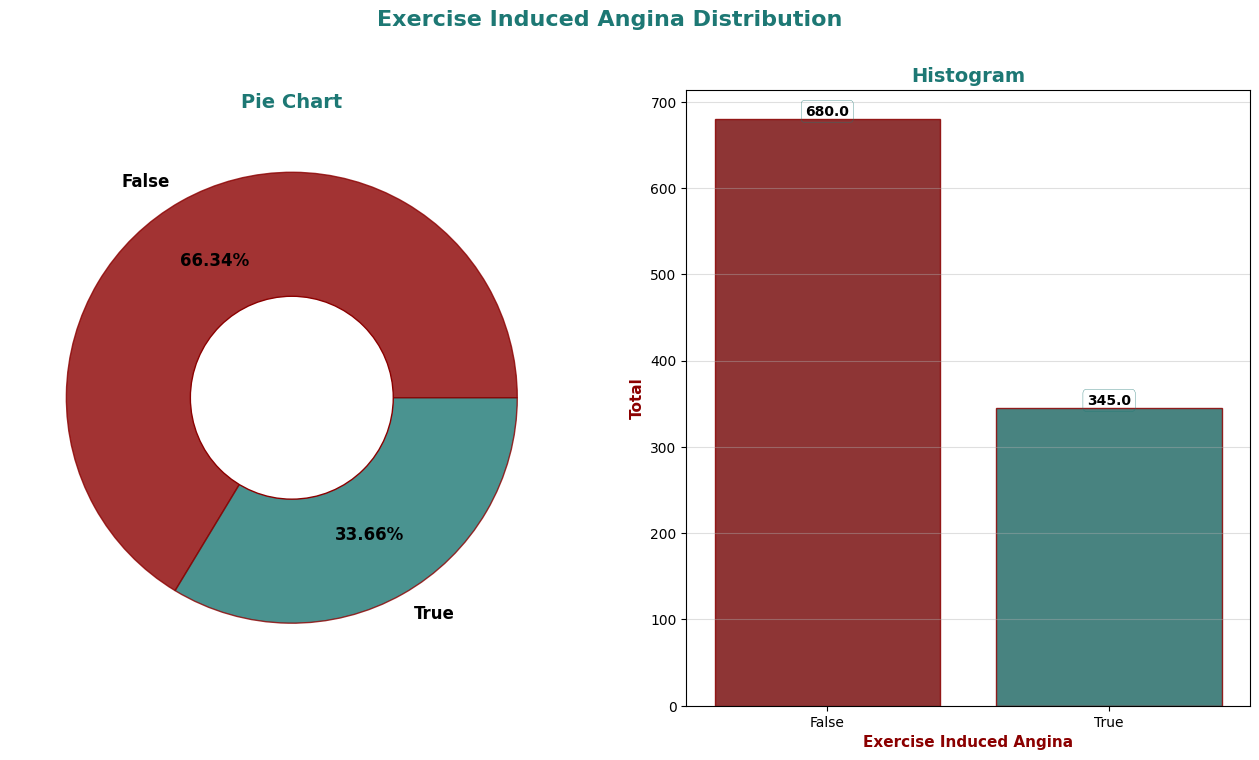

In [17]:
# --- Setting Colors, Labels, Order ---
colors = ["#8B0000", "#1d7874"]  # Colors adapted from the provided code
labels = ['False', 'True']
order = df['exang'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Exercise Induced Angina Distribution', fontweight='black', fontsize=16,
             fontfamily='sans-serif', color='#1d7874')

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='black', fontsize=14, fontfamily='sans-serif', color='#1d7874')
plt.pie(
    df['exang'].value_counts(),
    labels=labels,
    colors=colors,
    wedgeprops=dict(alpha=0.8, edgecolor='#8B0000'),  # Edge color adapted
    autopct='%.2f%%',
    pctdistance=0.7,
    textprops={'fontsize': 12, 'fontweight': 'black'}
)
centre = plt.Circle((0, 0), 0.45, fc='white', edgecolor='#8B0000')
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='black', fontsize=14, fontfamily='sans-serif', color='#1d7874')
ax = sns.countplot(
    x='exang',
    data=df,
    palette=colors,  # Using adapted colors
    order=order,
    edgecolor='#8B0000',  # Edge color adapted
    alpha=0.85
)
for rect in ax.patches:
    ax.text(
        rect.get_x() + rect.get_width() / 2,
        rect.get_height() + 4.25,
        rect.get_height(),
        ha='center',
        fontsize=10,
        fontweight='black',
        bbox=dict(facecolor='none', edgecolor='#1d7874', linewidth=0.25, boxstyle='round')
    )

plt.xlabel('Exercise Induced Angina', fontweight='black', fontsize=11, fontfamily='sans-serif', color='#8B0000')
plt.ylabel('Total', fontweight='black', fontsize=11, fontfamily='sans-serif', color='#8B0000')
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels without Dropping Null Values ---
print('*' * 35)
print('\033[1m' + '.: Exercise Induced Angina Total :.' + '\033[0m')
print('*' * 35)
print(df.exang.value_counts(dropna=False))


slope (Slope of the Peak Exercise)

********************
.: Slope Total :.
********************
slope
1    482
2    469
0     74
Name: count, dtype: int64


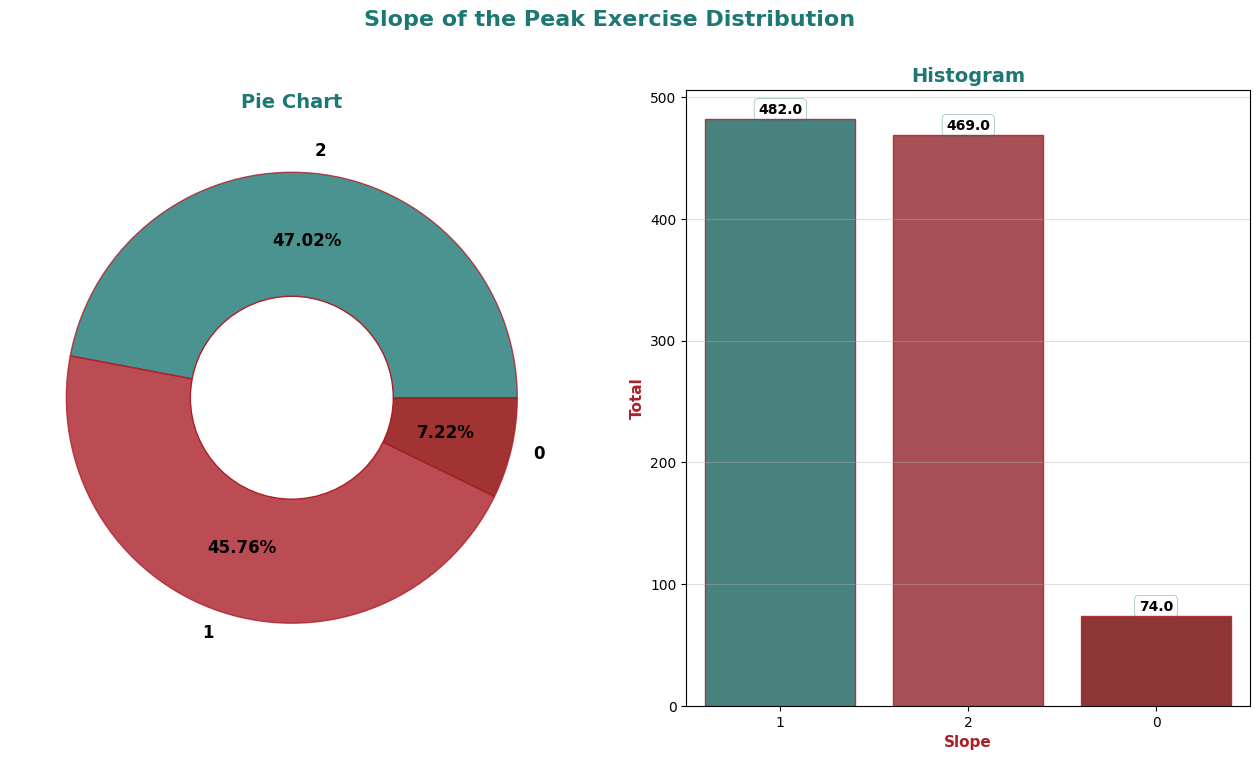

In [18]:
# --- Setting Colors, Labels, Order ---
colors = ["#1d7874", "#AC1F29", "#8B0000"]  # Adapted colors for visualization
labels = ['2', '1', '0']
order = df['slope'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Slope of the Peak Exercise Distribution', fontweight='black', fontsize=16,
             fontfamily='sans-serif', color='#1d7874')

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='black', fontsize=14, fontfamily='sans-serif', color='#1d7874')
plt.pie(
    df['slope'].value_counts(),
    labels=labels,
    colors=colors,
    wedgeprops=dict(alpha=0.8, edgecolor='#AC1F29'),  # Edge color adapted
    autopct='%.2f%%',
    pctdistance=0.7,
    textprops={'fontsize': 12, 'fontweight': 'black'}
)
centre = plt.Circle((0, 0), 0.45, fc='white', edgecolor='#AC1F29')
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='black', fontsize=14, fontfamily='sans-serif', color='#1d7874')
ax = sns.countplot(
    x='slope',
    data=df,
    palette=colors,  # Using adapted colors
    order=order,
    edgecolor='#AC1F29',  # Edge color adapted
    alpha=0.85
)
for rect in ax.patches:
    ax.text(
        rect.get_x() + rect.get_width() / 2,
        rect.get_height() + 4.25,
        rect.get_height(),
        ha='center',
        fontsize=10,
        fontweight='black',
        bbox=dict(facecolor='none', edgecolor='#1d7874', linewidth=0.25, boxstyle='round')
    )

plt.xlabel('Slope', fontweight='black', fontsize=11, fontfamily='sans-serif', color='#AC1F29')
plt.ylabel('Total', fontweight='black', fontsize=11, fontfamily='sans-serif', color='#AC1F29')
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels without Dropping Null Values ---
print('*' * 20)
print('\033[1m' + '.: Slope Total :.' + '\033[0m')
print('*' * 20)
print(df.slope.value_counts(dropna=False))


ca (Number of Major Vessels)

****************************************
.: Number of Major Vessels Total :.
****************************************
ca
0    578
1    226
2    134
3     69
4     18
Name: count, dtype: int64


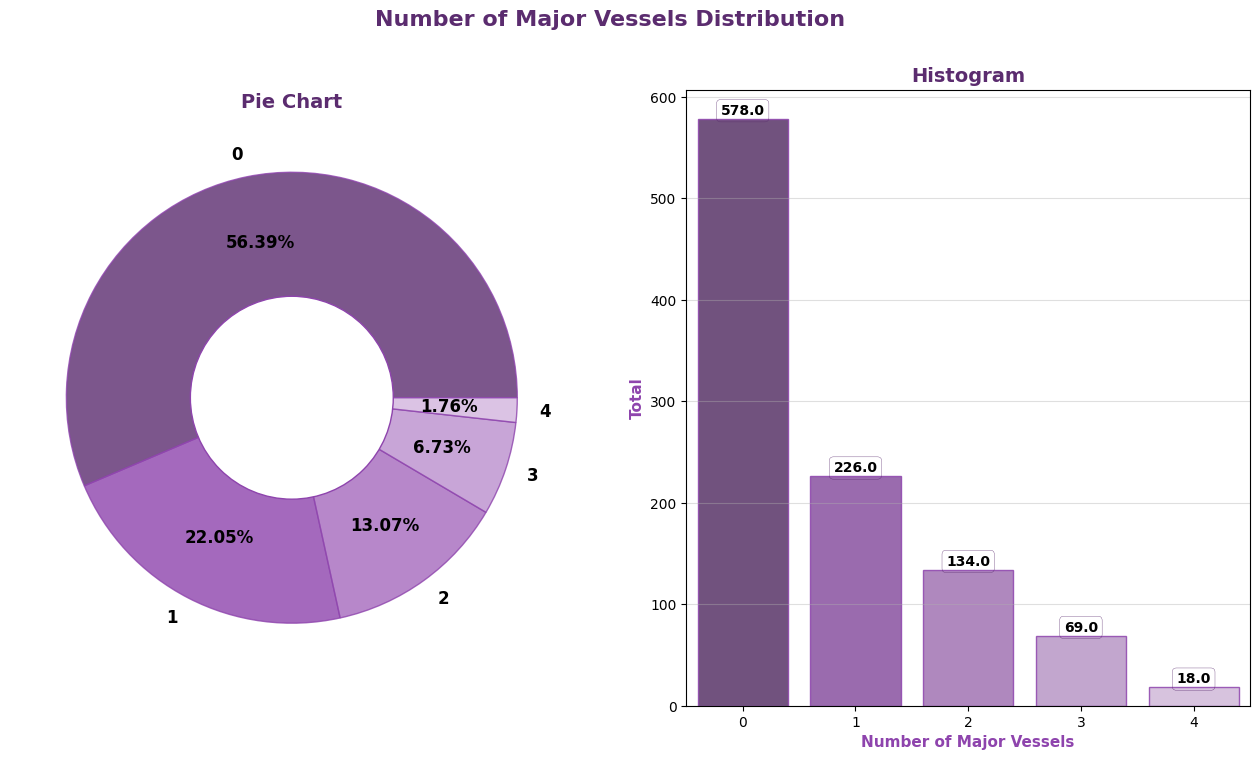

In [19]:
# --- Setting Colors, Labels, Order ---
colors = ["#5B2C6F", "#8E44AD", "#A569BD", "#BB8FCE", "#D2B4DE"]  # Adapted purple gradient colors
labels = ['0', '1', '2', '3', '4']
order = df['ca'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Number of Major Vessels Distribution', fontweight='black', fontsize=16,
             fontfamily='sans-serif', color='#5B2C6F')

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='black', fontsize=14, fontfamily='sans-serif', color='#5B2C6F')
plt.pie(
    df['ca'].value_counts(),
    labels=labels,
    colors=colors,
    wedgeprops=dict(alpha=0.8, edgecolor='#8E44AD'),  # Edge color adapted
    autopct='%.2f%%',
    pctdistance=0.7,
    textprops={'fontsize': 12, 'fontweight': 'black'}
)
centre = plt.Circle((0, 0), 0.45, fc='white', edgecolor='#8E44AD')
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='black', fontsize=14, fontfamily='sans-serif', color='#5B2C6F')
ax = sns.countplot(
    x='ca',
    data=df,
    palette=colors,  # Using adapted colors
    order=order,
    edgecolor='#8E44AD',  # Edge color adapted
    alpha=0.85
)
for rect in ax.patches:
    ax.text(
        rect.get_x() + rect.get_width() / 2,
        rect.get_height() + 4.25,
        rect.get_height(),
        ha='center',
        fontsize=10,
        fontweight='black',
        bbox=dict(facecolor='none', edgecolor='#5B2C6F', linewidth=0.25, boxstyle='round')
    )

plt.xlabel('Number of Major Vessels', fontweight='black', fontsize=11, fontfamily='sans-serif', color='#8E44AD')
plt.ylabel('Total', fontweight='black', fontsize=11, fontfamily='sans-serif', color='#8E44AD')
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels without Dropping Null Values ---
print('*' * 40)
print('\033[1m' + '.: Number of Major Vessels Total :.' + '\033[0m')
print('*' * 40)
print(df.ca.value_counts(dropna=False))


thal

********************
.: "thal" Total :.
********************
thal
2    544
3    410
1     64
0      7
Name: count, dtype: int64


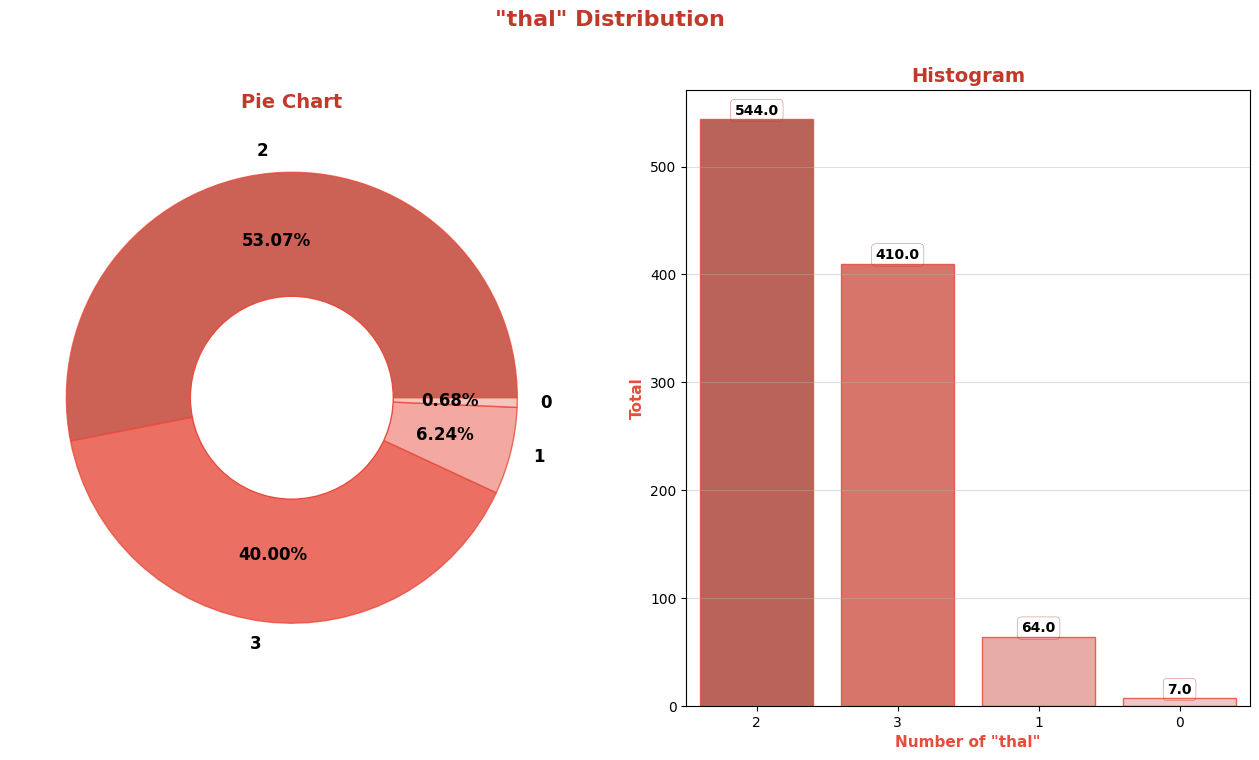

In [20]:
# --- Setting Colors, Labels, Order ---
colors = ["#C0392B", "#E74C3C", "#F1948A", "#F5B7B1"]  # Adapted red gradient colors
labels = ['2', '3', '1', '0']
order = df['thal'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('"thal" Distribution', fontweight='black', fontsize=16,
             fontfamily='sans-serif', color='#C0392B')

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='black', fontsize=14, fontfamily='sans-serif', color='#C0392B')
plt.pie(
    df['thal'].value_counts(),
    labels=labels,
    colors=colors,
    wedgeprops=dict(alpha=0.8, edgecolor='#E74C3C'),  # Edge color adapted
    autopct='%.2f%%',
    pctdistance=0.7,
    textprops={'fontsize': 12, 'fontweight': 'black'}
)

centre = plt.Circle((0, 0), 0.45, fc='white', edgecolor='#E74C3C')
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='black', fontsize=14, fontfamily='sans-serif', color='#C0392B')
ax = sns.countplot(
    x='thal',
    data=df,
    palette=colors,  # Using adapted colors
    order=order,
    edgecolor='#E74C3C',  # Edge color adapted
    alpha=0.85
)
for rect in ax.patches:
    ax.text(
        rect.get_x() + rect.get_width() / 2,
        rect.get_height() + 4.25,
        rect.get_height(),
        ha='center',
        fontsize=10,
        fontweight='black',
        bbox=dict(facecolor='none', edgecolor='#C0392B', linewidth=0.25, boxstyle='round')
    )

plt.xlabel('Number of "thal"', fontweight='black', fontsize=11, fontfamily='sans-serif', color='#E74C3C')
plt.ylabel('Total', fontweight='black', fontsize=11, fontfamily='sans-serif', color='#E74C3C')
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels without Dropping Null Values ---
print('*' * 20)
print('\033[1m' + '.: "thal" Total :.' + '\033[0m')
print('*' * 20)
print(df.thal.value_counts(dropna=False))





Target



*********************************************
.: Heart Diseases Status (target) Total :.
*********************************************
target
1    526
0    499
Name: count, dtype: int64


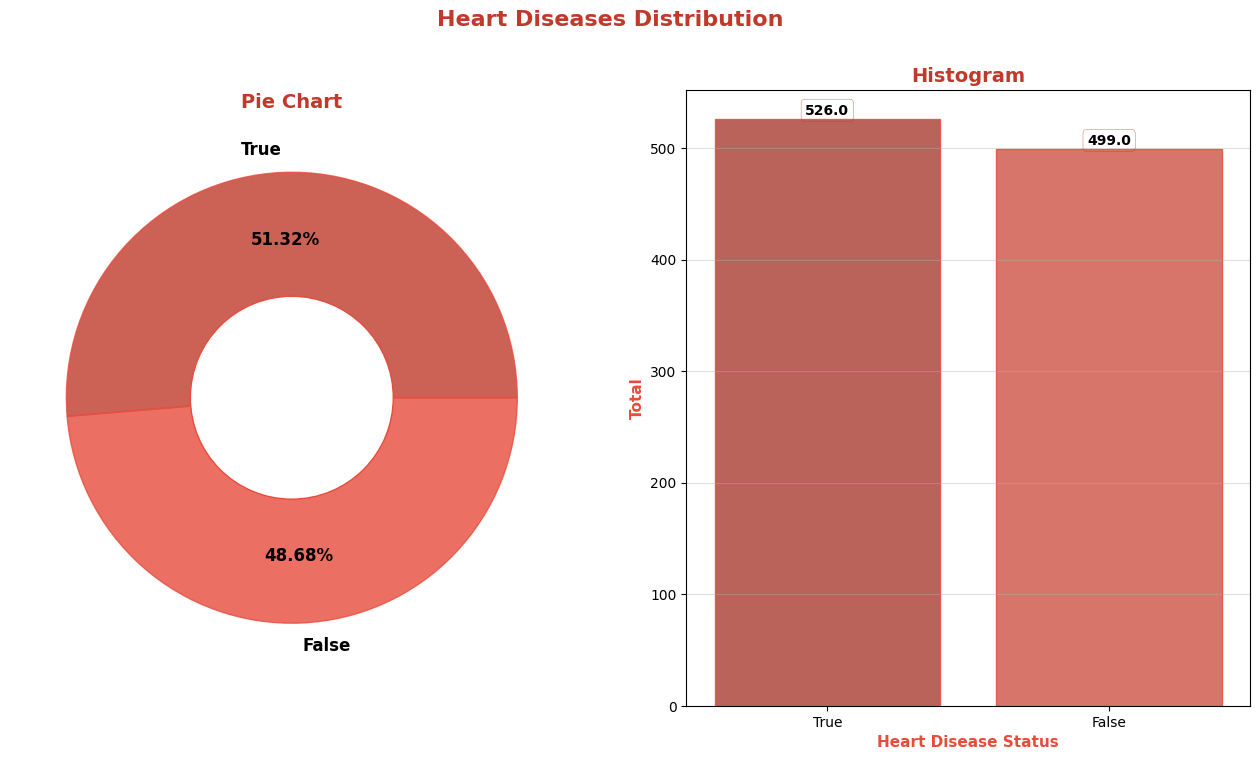

In [21]:
# --- Setting Colors, Labels, Order ---
colors = ["#C0392B", "#E74C3C", "#F1948A", "#F5B7B1"]  # Adapted red gradient colors
labels = ['True', 'False']
order = df['target'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Heart Diseases Distribution', fontweight='black',
             fontsize=16, fontfamily='sans-serif', color='#C0392B')

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='black', fontsize=14, fontfamily='sans-serif', color='#C0392B')
plt.pie(
    df['target'].value_counts(),
    labels=labels,
    colors=colors,
    wedgeprops=dict(alpha=0.8, edgecolor='#E74C3C'),  # Edge color adapted
    autopct='%.2f%%',
    pctdistance=0.7,
    textprops={'fontsize': 12, 'fontweight': 'black'}
)
centre = plt.Circle((0, 0), 0.45, fc='white', edgecolor='#E74C3C')
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='black', fontsize=14, fontfamily='sans-serif', color='#C0392B')
ax = sns.countplot(
    x='target',
    data=df,
    palette=colors,
    order=order,
    edgecolor='#E74C3C',  # Edge color adapted
    alpha=0.85
)
for rect in ax.patches:
    ax.text(
        rect.get_x() + rect.get_width() / 2,
        rect.get_height() + 4.25,
        rect.get_height(),
        ha='center',
        fontsize=10,
        fontweight='black',
        bbox=dict(facecolor='none', edgecolor='#C0392B', linewidth=0.25, boxstyle='round')
    )

plt.xlabel('Heart Disease Status', fontweight='black', fontsize=11,
           fontfamily='sans-serif', color='#E74C3C')
plt.ylabel('Total', fontweight='black', fontsize=11, fontfamily='sans-serif',
           color='#E74C3C')
plt.xticks([0, 1], labels)  # Adding custom tick labels for True and False
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels without Dropping Null Values ---
print('*' * 45)
print('\033[1m' + '.: Heart Diseases Status (target) Total :.' + '\033[0m')
print('*' * 45)
print(df.target.value_counts(dropna=False))


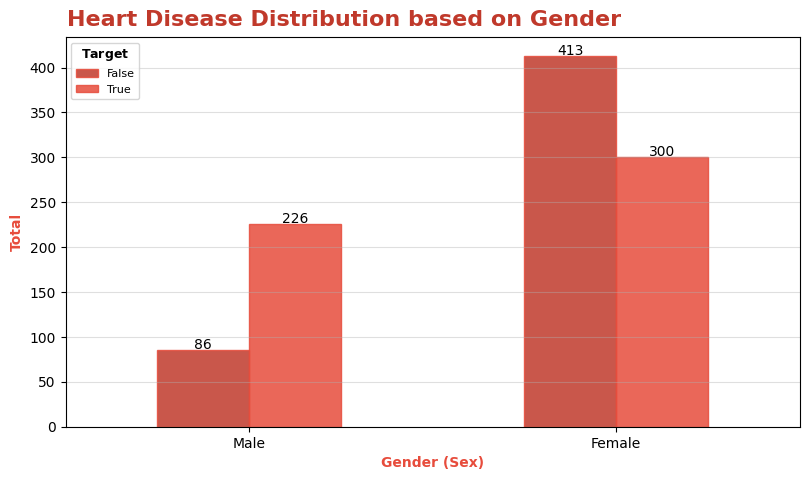

In [22]:
# --- Labels Settings ---
labels = ['False', 'True']
label_gender = np.array([0, 1])
label_gender2 = ['Male', 'Female']

# --- Creating Bar Chart ---
ax = pd.crosstab(df.sex, df.target).plot(
    kind='bar',
    figsize=(8, 5),
    color=["#C0392B", "#E74C3C"],  # Adapted color mix for bar chart
    edgecolor='#E74C3C',  # Adapted edge color
    alpha=0.85
)

# --- Bar Chart Settings ---
for rect in ax.patches:
    ax.text(
        rect.get_x() + rect.get_width() / 2,
        rect.get_height() + 1.25,
        rect.get_height(),
        ha='center',
        fontsize=10
    )

plt.suptitle(
    'Heart Disease Distribution based on Gender',
    fontweight='heavy',
    x=0.065,
    y=0.98,
    ha='left',
    fontsize='16',
    fontfamily='sans-serif',
    color='#C0392B'
)

plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Gender (Sex)',
           fontfamily='sans-serif',
           fontweight='bold',
           color='#E74C3C')
plt.ylabel('Total',
           fontfamily='sans-serif',
           fontweight='bold',
           color='#E74C3C')
plt.xticks(label_gender, label_gender2, rotation=0)
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.legend(
    labels=labels,
    title='$\\bf{Target}$',
    fontsize='8',
    title_fontsize='9',
    loc='upper left',
    frameon=True
);


 Female tend to have heart diseases compared to Male. In male, the distribution is not imbalanced compared to female\nthat have almost the same distribution'

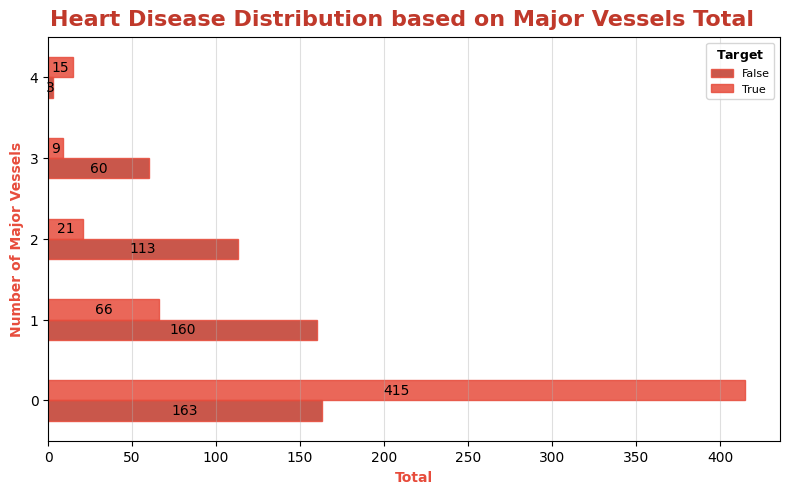

In [23]:
# --- Labels Settings ---
labels = ['False', 'True']

# --- Creating Horizontal Bar Chart ---
ax = pd.crosstab(df.ca, df.target).plot(
    kind='barh',
    figsize=(8, 5),
    color=["#C0392B", "#E74C3C"],  # Adapted color mix for bar chart
    edgecolor='#E74C3C',  # Adapted edge color
    alpha=0.85
)

# --- Horizontal Bar Chart Settings ---
for rect in ax.patches:
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    ax.text(
        x + width / 2,
        y + height / 2,
        '{:.0f}'.format(width),
        ha='center',
        va='center'
    )

plt.suptitle(
    'Heart Disease Distribution based on Major Vessels Total',
    fontweight='heavy',
    x=0.069,
    y=0.98,
    ha='left',
    fontsize='16',
    fontfamily='sans-serif',
    color='#C0392B'
)

plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Total',
           fontfamily='sans-serif',
           fontweight='bold',
           color='#E74C3C')
plt.ylabel('Number of Major Vessels',
           fontfamily='sans-serif',
           fontweight='bold',
           color='#E74C3C')
plt.yticks(rotation=0)
plt.grid(axis='x', alpha=0.4)
plt.grid(axis='y', alpha=0)
plt.legend(
    labels=labels,
    title='$\\bf{Target}$',
    fontsize='8',
    frameon=True,
    title_fontsize='9',
    loc='upper right'
);


Patients with 0 and 4 major vessels tend to have heart diseases. However, patients who have a number of vessels 1 to 3\ntend not to have heart diseases.

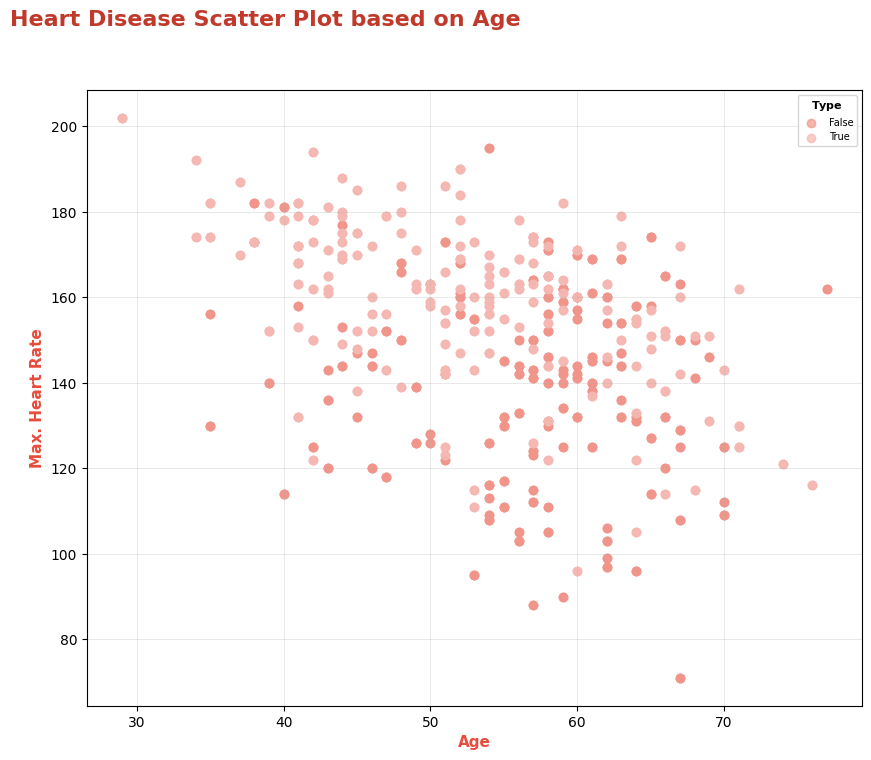

In [24]:
# -- Scatter Plot Size & Titles Settings ---
plt.figure(figsize=(10, 8))
plt.suptitle(
    'Heart Disease Scatter Plot based on Age',
    fontweight='heavy',
    x=0.048,
    y=0.98,
    ha='left',
    fontsize='16',
    fontfamily='sans-serif',
    color='#C0392B'  # Adapted color
)

plt.tight_layout(rect=[0, 0.04, 1, 1.01])

# --- Creating Scatter Plot ---
plt.scatter(
    x=df.age[df.target == 0],
    y=df.thalach[df.target == 0],
    c='#F1948A',  # Adapted color for no heart disease
    label='False',
    alpha=0.7
)
plt.scatter(
    x=df.age[df.target == 1],
    y=df.thalach[df.target == 1],
    c='#F5B7B1',  # Adapted color for heart disease
    label='True',
    alpha=0.7
)

# --- Scatter Plot Legend & Labels Settings ---
plt.legend(
    title='$\\bf{Type}$',
    fontsize='7',
    title_fontsize='8',
    loc='upper right',
    frameon=True
)
plt.xlabel(
    'Age',
    fontweight='bold',
    fontsize='11',
    fontfamily='sans-serif',
    color='#E74C3C'  # Adapted color
)
plt.ylabel(
    'Max. Heart Rate',
    fontweight='bold',
    fontsize='11',
    fontfamily='sans-serif',
    color='#E74C3C'  # Adapted color
)
plt.ticklabel_format(style='plain', axis='both')
plt.grid(axis='both', alpha=0.4, lw=0.5)
plt.show();


Based on age, patients with and without heart diseases mostly between 50-70 years old. Patients with heart diseases tend to have high heart rate\ncompared to patients with no heart diseases.

<Axes: xlabel='age', ylabel='Count'>

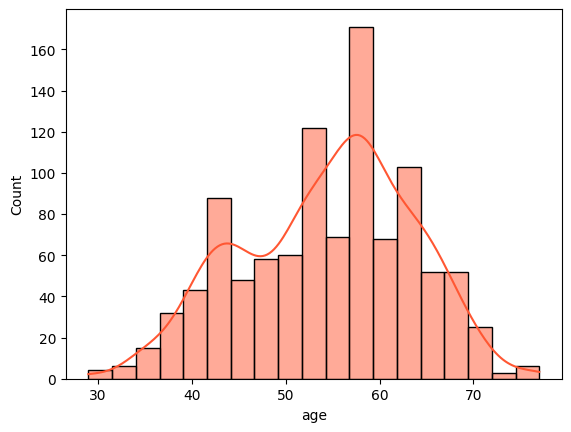

In [25]:
# Define custom colors
custom_colors = ["#FF5733", "#3366FF", "#33FF57"]  # Example colors, you can adjust as needed

# Plot the histogram with custom colors
sns.histplot(df['age'], kde=True, color="#FF5733", palette=custom_colors)

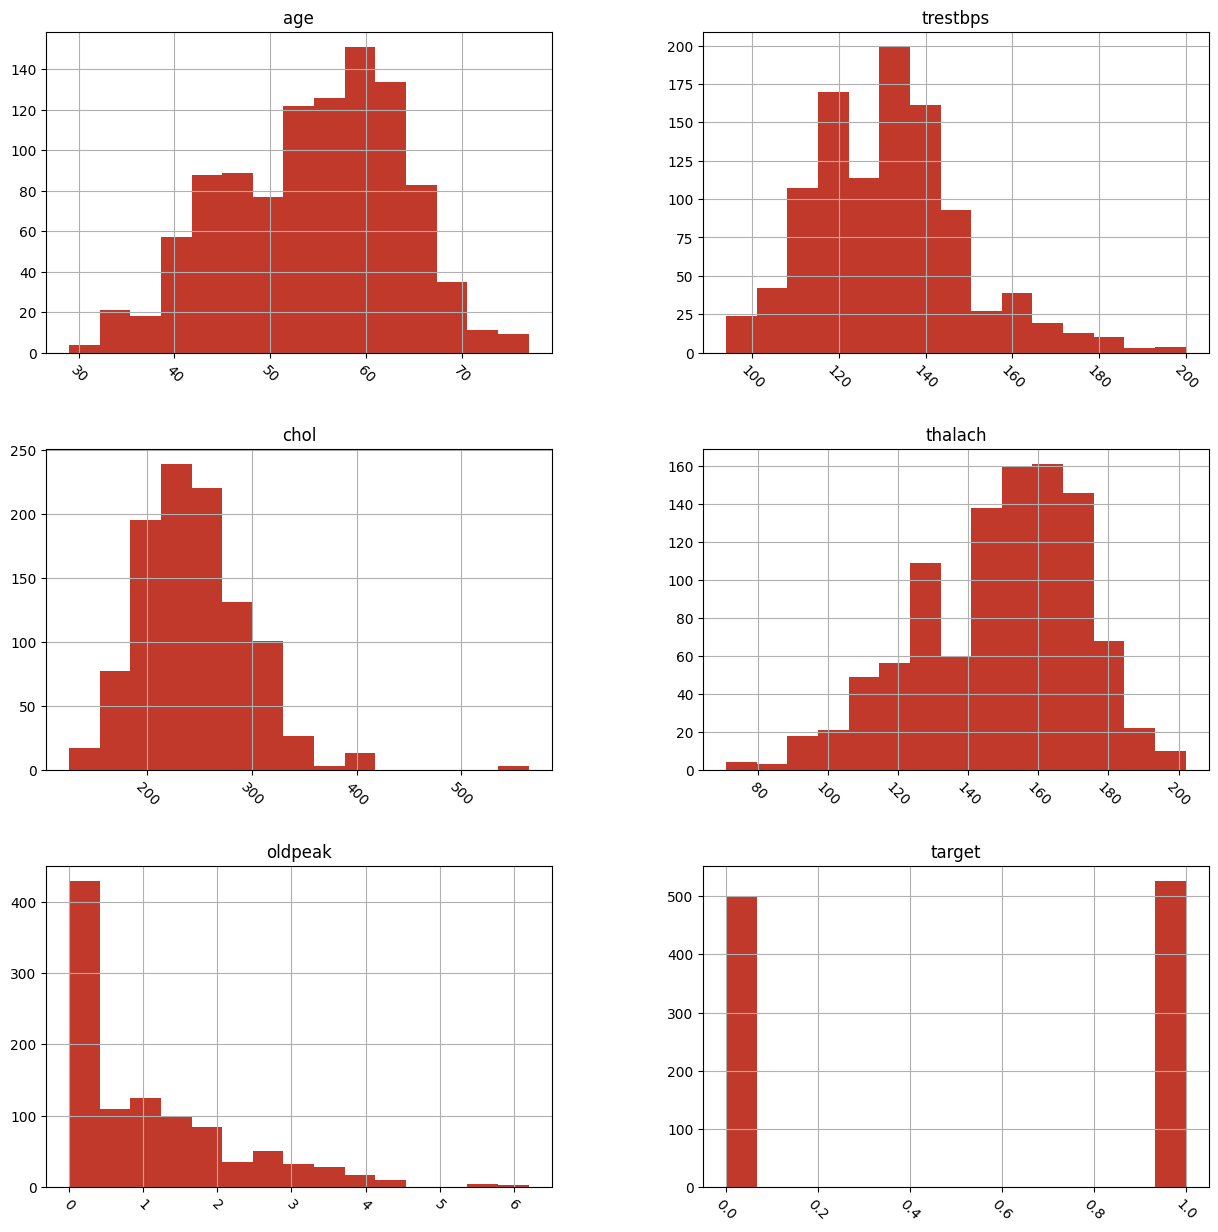

In [26]:
# Define a color for the histograms
hist_color = '#C0392B'  # Example color; adjust as needed

# Create histograms with color
df.hist(figsize=(15, 15), xrot=-45, bins=15, color=hist_color)

# Show the plot
plt.show()


Dealing With Outliers

Let's create a box plots for all the numeric columns using for loop and subplot.

By doing we will be able to analyze outliers in the columns.

In [27]:
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

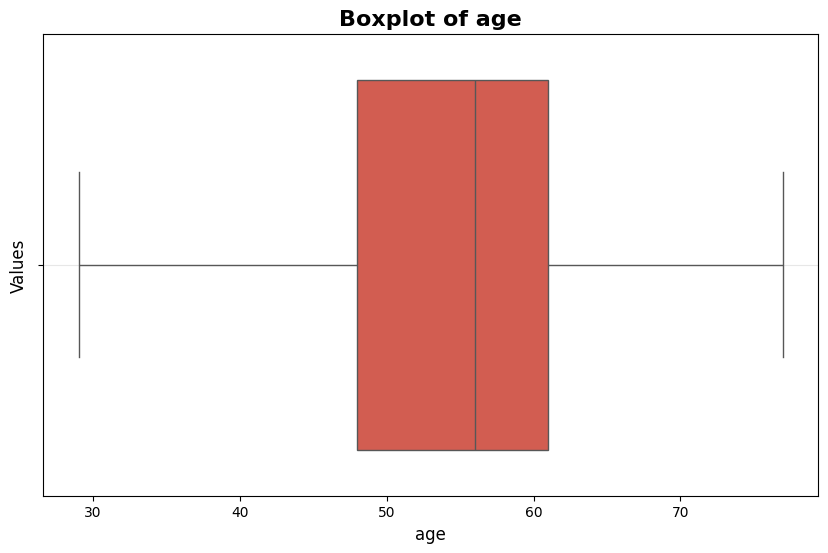

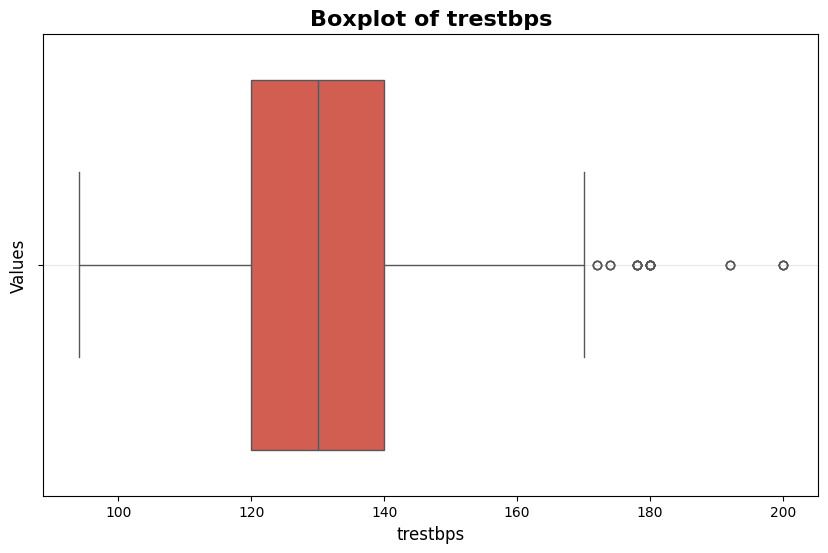

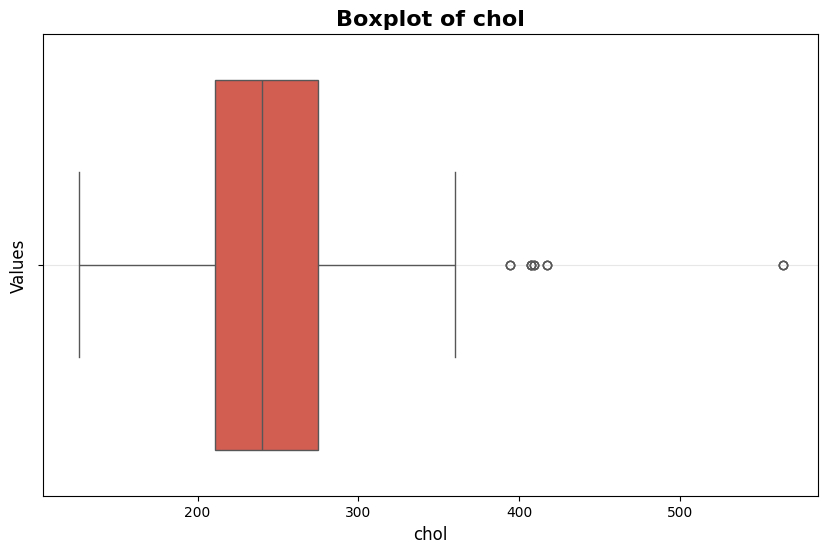

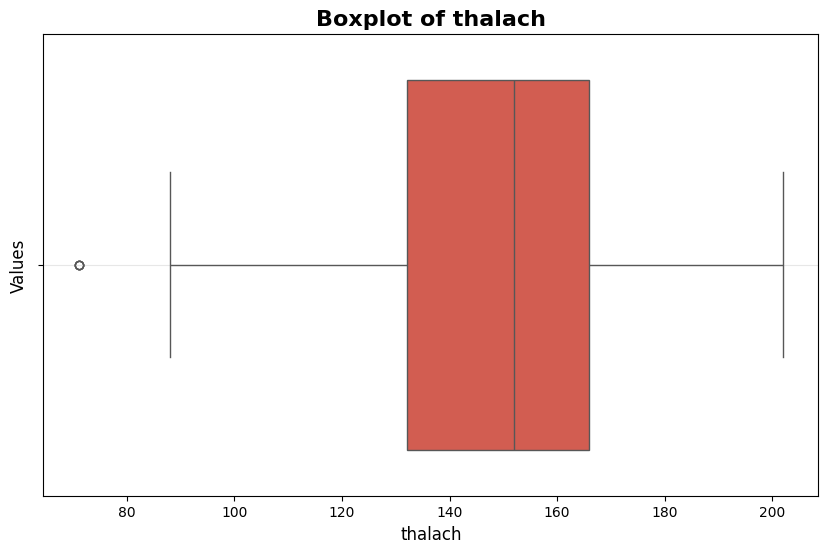

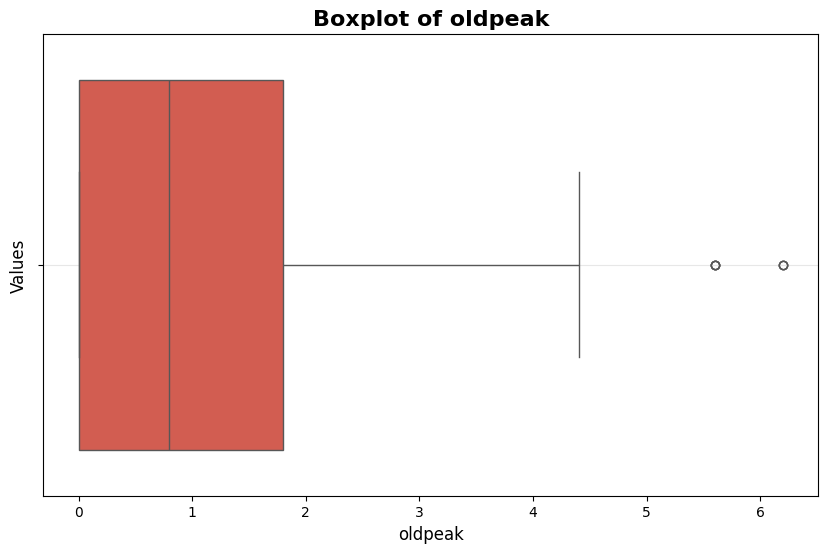

In [28]:
boxplot_color ='#e74c3c'  # Example color (blue), you can choose any color you like

for feature in numerical_columns:
    plt.figure(figsize=(10, 6))  # Set the figure size for each plot
    sns.boxplot(x=df[feature], color=boxplot_color)  # Create the boxplot with the specified color
    plt.title(f'Boxplot of {feature}', fontsize=16, fontweight='bold')  # Add title with feature name
    plt.xlabel(feature, fontsize=12)  # Label x-axis
    plt.ylabel('Values', fontsize=12)  # Label y-axis
    plt.grid(axis='y', alpha=0.3)  # Optional: add grid for better readability
    plt.show()  # Display the plot

In [29]:
df['chol'].describe()


count    1025.00000
mean      246.00000
std        51.59251
min       126.00000
25%       211.00000
50%       240.00000
75%       275.00000
max       564.00000
Name: chol, dtype: float64

It seems there are outliers in the columns but the max value 564 and the min value is 126 which is a possible range in serum cholestoral in mg/dl.

In [30]:
df['trestbps'].describe()

count    1025.000000
mean      131.611707
std        17.516718
min        94.000000
25%       120.000000
50%       130.000000
75%       140.000000
max       200.000000
Name: trestbps, dtype: float64

#Normal Ranges of resting blood pressure

Normal Blood Pressure: Generally considered to be around 120/80 mm Hg.

Elevated Blood Pressure: Typically ranges from 120-129 systolic and less than 80 diastolic.

Hypertension Stage 1: Systolic between 130-139 or diastolic between 80-89.

Hypertension Stage 2: Systolic 140 or higher or diastolic 90 or higher.

In [31]:
df['thalach'].describe()

count    1025.000000
mean      149.114146
std        23.005724
min        71.000000
25%       132.000000
50%       152.000000
75%       166.000000
max       202.000000
Name: thalach, dtype: float64

here max and min aare in the possible range


In [32]:
df["oldpeak"].describe()

count    1025.000000
mean        1.071512
std         1.175053
min         0.000000
25%         0.000000
50%         0.800000
75%         1.800000
max         6.200000
Name: oldpeak, dtype: float64

#Analysis
Everything seems ok and there is no outliers in the columns.

Columns are cleaned from outliers and missing values and we have already
analysis the data.

The next step should be Model building.

<Axes: >

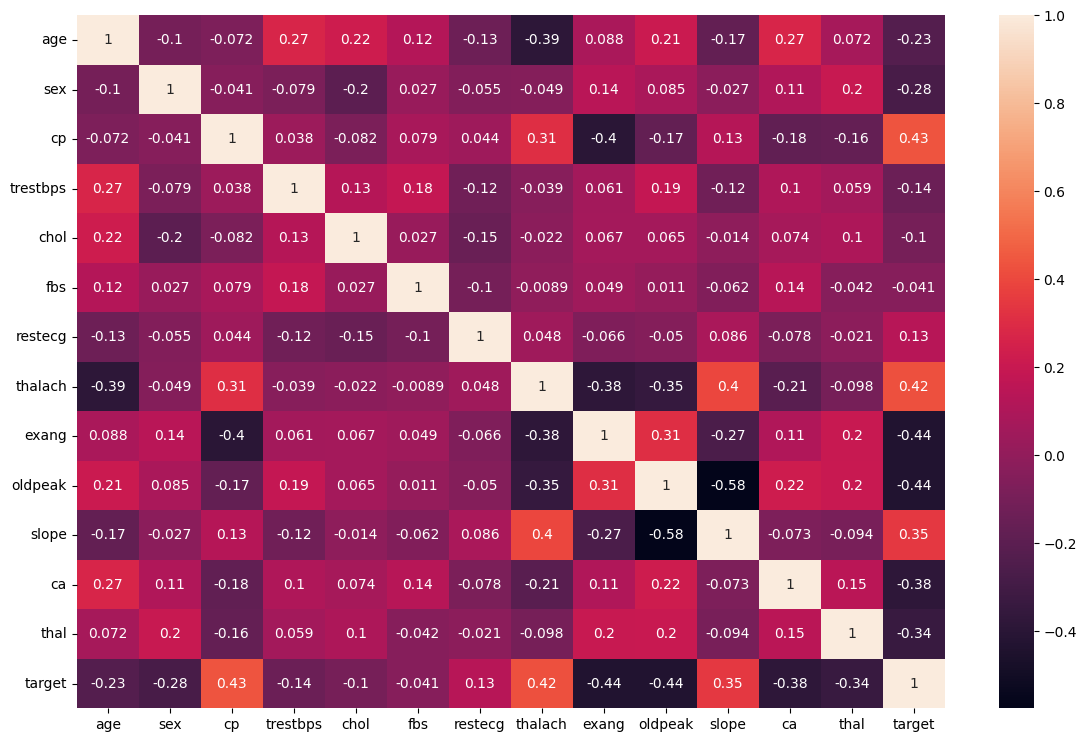

In [33]:
plt.figure(figsize=(14, 9))
sns.heatmap(df.corr(), annot=True)

Resting blood pressure, cholestoral, and "oldpeak" have moderate relationship with age.eatures like "cp," "thalach," "exang," and "oldpeak" appear to have the most significant correlations with the target variable

In [34]:
x = df.drop(['target'], axis=1)
y = df['target']

In [35]:
len(x)

1025

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,recall_score, f1_score, confusion_matrix

In [37]:
X_train, X_test, y_train , y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [38]:
# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']),
        ('cat', OneHotEncoder(drop='first'), ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
    ])

In [39]:
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=20, min_samples_split=15))
])

In [40]:
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'oldpeak']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'ca', 'thal'])])),
                ('classifier',
                 RandomForestClassifier(max_leaf_nodes=20, min_samples_split=15,
                                        n_estimators=1000, random_state=1))])

In [41]:
# Make predictions (assuming X_test is defined)
predictions_rf = pipeline_rf.predict(X_test)


In [42]:
accuracy_rf = accuracy_score(y_test, predictions_rf)
recall_rf = recall_score(y_test, predictions_rf)
f1_rf = f1_score(y_test, predictions_rf)

In [43]:
# Print the accuracy, recall, and F1 score
print(f"Accuracy (Random Forest): {accuracy_rf:.2f}")
print(f"Recall (Random Forest): {recall_rf:.2f}")
print(f"F1 Score (Random Forest): {f1_rf:.2f}")

Accuracy (Random Forest): 0.93
Recall (Random Forest): 0.94
F1 Score (Random Forest): 0.94


In [44]:
conf_matrix_rf = confusion_matrix(y_test, predictions_rf)
print("Confusion Matrix (Random Forest):\n", conf_matrix_rf)

Confusion Matrix (Random Forest):
 [[ 90   8]
 [  6 101]]


In [45]:
pipeline_gb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier',GradientBoostingClassifier(random_state=1, n_estimators=100, max_leaf_nodes=3, loss='exponential',min_samples_leaf=20))
])

In [46]:
pipeline_gb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'oldpeak']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'ca', 'thal'])])),
                ('classifier',
                 GradientBoostingClassifier(loss='exponential',
                                            max_leaf_nodes=3,
                                            min_samples_leaf=20,
                                            random_state=1))])

In [47]:
predictions_gb = pipeline_gb.predict(X_test)

In [48]:
accuracy_gb = accuracy_score(y_test, predictions_gb)
recall_gb = recall_score(y_test, predictions_gb)
f1_gb = f1_score(y_test, predictions_gb)

In [49]:
# Print the accuracy, recall, and F1 score
print(f"Accuracy (Gradient Boost): {accuracy_gb:.2f}")
print(f"Recall (Gradient Boost): {recall_gb:.2f}")
print(f"F1 Score (Gradient Boost): {f1_gb:.2f}")

Accuracy (Gradient Boost): 0.90
Recall (Gradient Boost): 0.93
F1 Score (Gradient Boost): 0.91


In [50]:
conf_matrix_gb = confusion_matrix(y_test, predictions_gb)
print("Confusion Matrix (Random Forest):\n", conf_matrix_gb)

Confusion Matrix (Random Forest):
 [[ 85  13]
 [  7 100]]


In [51]:
import joblib

In [52]:
joblib.dump(pipeline_rf, 'pipeline_rf.pkl')
joblib.dump(pipeline_gb, 'pipeline_gb.pkl')

['pipeline_gb.pkl']